# Question 1
(INDEXING AND SLICING ARRAYS) Create an array containing the values 1–15, reshape it
into a 3-by-5 array, then use indexing and slicing techniques to perform each of the following
operations:
- a) Select row 2.
- b) Select column 4.
- c) Select rows 0 and 1.
- d) Select columns 2–4.
- e) Select the element that is in row 1 and column 4.
- f) Select all elements from rows 1 and 2 that are in columns 0, 2 and 4

In [12]:
import numpy as np

arr = []
arr = np.arange(1,16,1)
arr = np.reshape(arr,(3,5))

print("This is the Array:\n", arr)
print("\nRow two: ", arr[1])
print("\nColumn four: ", arr[:,3])
print("\nRow zero and one: \n", arr[:2])
print("\nColumn two, three, and four: \n", arr[:,2:5])
print("\nElement (1,4): ", arr[1][4])
print("\nElements from rows 1 and 2 that are in columns 0, 2 and 4\n", arr[1:3,(0,2,4)]) #I didn't actually expect that to work, cool!!



This is the Array:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]

Row two:  [ 6  7  8  9 10]

Column four:  [ 4  9 14]

Row zero and one: 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]

Column two, three, and four: 
 [[ 3  4  5]
 [ 8  9 10]
 [13 14 15]]

Element (1,4):  10

Elements from rows 1 and 2 that are in columns 0, 2 and 4
 [[ 6  8 10]
 [11 13 15]]


# Question 2
For this question, please use the NumPy Python library. Make sure you have installed NumPy,
Pandas, SciPy, and Matplotlib Python libraries. Use command pip (for Windows) or pip3 (for
MacOS).
Write a program to load a given dataset called Student_Grades.csv into a NumPy array. Then
determine the following items:
- a) Display all data on screen.
- b) Determine how many students were in the dataset?
- c) Display the number of rows and columns of your numpy array.
- d) Display the array data types.
- e) Display the following Descriptive Statistics of students’ overall percentage scores:
> - a. Min score
> - b. Max score
> - c. Mean value
> - d. Median
> - e. Mode
> - f. Standard Deviation
> - g. 25% and 75% percentile
- f) Determine how many students achieved an A grade, B, C, D and F grades.
- g) Create a pie chart based on the above grade achievements (option f)

Welcome to Student Grades! Here is the current file:
[[  15.        50.        50.      ...  207.      1442.        94.1868 ]
 [  15.        50.        50.      ...  197.      1322.        86.34879]
 [  15.        50.        50.      ...  210.      1510.        98.62834]
 ...
 [  15.        50.        50.      ...  200.      1374.        89.74526]
 [  15.        50.        50.      ...  195.      1287.        84.0627 ]
 [  15.        50.        50.      ...  210.      1490.        97.32201]]

There are 33 students in this file

The rows and columns of this file are: (33, 32)

The datatypes of this array are:  float64

Lowest Score: 		 29.65382
Highest Score: 		 99.86936
Mean score value: 	 87.66996787878789
Median score value: 	 92.88047
Mode score value: 	 ModeResult(mode=94.1868, count=2)
Standard Deviation: 	 15.553686425410683
25% percentile		 87.1979
75% percentile		 96.73416

The letter grade distribution in the class is as follows: {'A': 21, 'B': 8, 'C': 1, 'D': 1, 'F': 2}


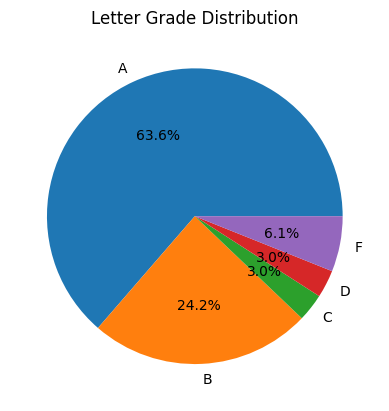

In [8]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
from scipy import stats
import os

print('Welcome to Student Grades! Here is the current file:')
# a) Display all data on screen.
#Also, make sure to skip first row since that's just metadata (am i using that word right....)
file = np.loadtxt('Student_Grades.csv', delimiter=',', skiprows=1)
print(file)

# - b) Determine how many students were in the dataset? == num of rows 
rows, columns = np.shape(file)
print('\nThere are', rows, 'students in this file')

# - c) Display the number of rows and columns of your numpy array.
print('\nThe rows and columns of this file are:', (rows, columns))

# - d) Display the array data types.
print('\nThe datatypes of this array are: ', file.dtype) #it's float by default but whtv

# - e) Display the following Descriptive Statistics of students’ overall percentage scores:
    # > - a. Min score
    # > - b. Max score
    # > - c. Mean value
    # > - d. Median
    # > - e. Mode
    # > - f. Standard Deviation
    # > - g. 25% and 75% percentile
scores = file[:,-1]
scores.sort()
print('\nLowest Score: \t\t', scores[0])
print('Highest Score: \t\t', scores[-1])
print('Mean score value: \t', np.mean(scores))
print('Median score value: \t', np.median(scores))
print('Mode score value: \t', stats.mode(scores))
print('Standard Deviation: \t', np.std(scores))
print('25% percentile\t\t', np.percentile(scores, 25))
print('75% percentile\t\t', np.percentile(scores, 75))
# - f) Determine how many students achieved an A grade, B, C, D and F grades.

letters = {'A':0, 'B':0, 'C':0, 'D':0, 'F':0}
for i in scores:
    if i >= 90: 
        letters['A'] += 1
    elif i >= 80:
        letters['B']  += 1
    elif i >= 70:
        letters['C']  += 1
    elif i >= 60:
        letters['D']  += 1
    else:
        letters['F']  += 1
print('\nThe letter grade distribution in the class is as follows:' ,letters)

# - g) Create a pie chart based on the above grade achievements (option f)
plt.title('Letter Grade Distribution')
plt.pie(letters.values(), labels=letters.keys(),autopct='%1.1f%%')
plt.show()